# Forecast skill 

This notebook contains a summary of some skill results to date

In [1]:
import xarray as xr

import xskillscore as xs

import matplotlib.cm as cm
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs

cartopy.config["pre_existing_data_dir"] = "../../data/cartopy-data"
cartopy.config["data_dir"] = "../../data/cartopy-data"

/g/data/xv83/users/ds0092/software/miniconda3/envs/forecast_analysis/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
SKILL_DIR = "../../data/skill/"
DATA_DIR = "../../data/processed/"

## SST anomaly correlation coefficient

In [7]:
f6__annual_rXY = xr.open_zarr(
    f"{SKILL_DIR}/CAFEf6.HadISST.annual.anom_1991-2020.sst.rXY_1991-2020.zarr"
).compute()

can_annual_rXY = xr.open_zarr(
    f"{SKILL_DIR}/CanESM5.HadISST.annual.anom_1985-2014.sst.rXY_1985-2014.zarr"
).compute()

In [15]:
can_annual_rXY["sst"].isel(lead=1).max()

<xarray.DataArray 'sst' ()>
array(1.36720455)
Coordinates:
    lead     int64 23

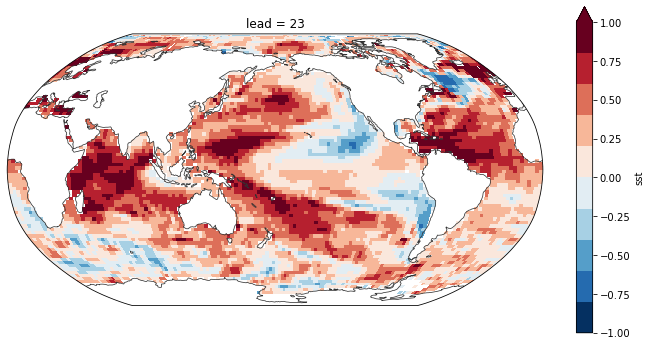

In [17]:
fig = plt.figure(figsize=(12, 6), edgecolor="k")
ax = fig.add_subplot(111, projection=ccrs.Robinson(180))
cmap = cm.get_cmap("RdBu_r", 10)

p = (
    can_annual_rXY["sst"]
    .isel(lead=1)
    .plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap=cmap)
)

p.axes.coastlines(color=[0.2, 0.2, 0.2], linewidth=0.75)

In [104]:
can_rXY_XU = xr.open_zarr(
    f"{SKILL_DIR}/CanESM5.HadISST.annual.anom_1991-2020.sst.rXY_XU.zarr"
).compute()
can_rYU = xr.open_zarr(
    f"{SKILL_DIR}/CanESM5.HadISST.annual.anom_1991-2020.sst.rYU.zarr"
).compute()

can_ri, can_ru = decompose_correlation(can_rXY_XU, can_rYU)

In [ ]:
ec_rXY_XU = xr.open_zarr(
    f"{SKILL_DIR}/CanESM5.HadISST.annual.anom_1991-2020.sst.rXY_XU.zarr"
).compute()
ec_rYU = xr.open_zarr(
    f"{SKILL_DIR}/CanESM5.HadISST.annual.anom_1991-2020.sst.rYU.zarr"
).compute()

ec_ri, ec_ru = decompose_correlation(ec_rXY_XU, ec_rYU)

In [127]:
f6_rXY_XU = xr.open_zarr(
    f"{SKILL_DIR}/CAFEf6.HadISST.annual.anom_1991-2020.sst.rXY_XU.zarr"
).compute()
f6_rYU = xr.open_zarr(
    f"{SKILL_DIR}/CAFEf6.HadISST.annual.anom_1991-2020.sst.rYU.zarr"
).compute()

f6_ri, f6_ru = decompose_correlation(f6_rXY_XU, f6_rYU)

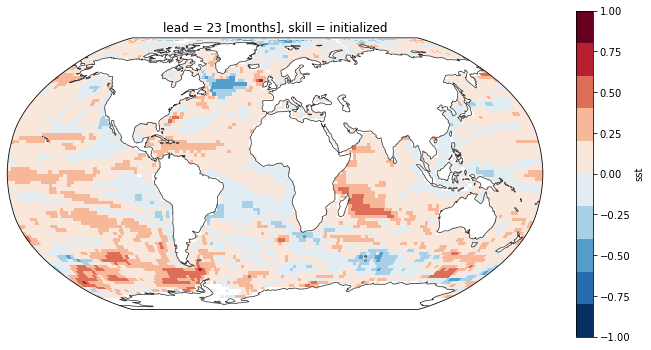

In [143]:
fig = plt.figure(figsize=(12, 6), edgecolor="k")
ax = fig.add_subplot(111, projection=ccrs.Robinson(0))
cmap = cm.get_cmap("RdBu_r", 10)

p = (
    can_ri["sst"]
    .isel(lead=1)
    .plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap=cmap)
)

p.axes.coastlines(color=[0.2, 0.2, 0.2], linewidth=0.75)

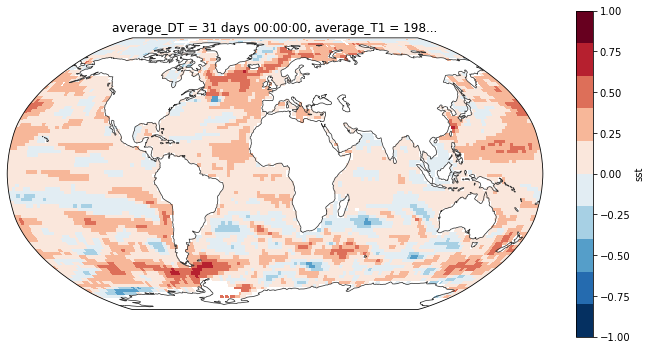

In [145]:
fig = plt.figure(figsize=(12, 6), edgecolor="k")
ax = fig.add_subplot(111, projection=ccrs.Robinson(0))

p = (
    f6_ri["sst"]
    .isel(lead=1)
    .plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap=cmap)
)

p.axes.coastlines(color=[0.2, 0.2, 0.2], linewidth=0.75)